<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#한글-POS-Tagging" data-toc-modified-id="한글-POS-Tagging-1">한글 POS Tagging</a></span></li><li><span><a href="#한글-형태소-분석기-성능-비교" data-toc-modified-id="한글-형태소-분석기-성능-비교-2">한글 형태소 분석기 성능 비교</a></span></li><li><span><a href="#한글-실제-데이터(법전)-pos-tagging" data-toc-modified-id="한글-실제-데이터(법전)-pos-tagging-3">한글 실제 데이터(법전) pos tagging</a></span></li><li><span><a href="#naver-뉴스-기사-POS-tagging" data-toc-modified-id="naver-뉴스-기사-POS-tagging-4">naver 뉴스 기사 POS tagging</a></span></li></ul></div>

### 한글 POS Tagging

In [1]:
#!pip install konlpy

from konlpy.tag import Hannanum   # 한나눔

In [2]:
obj = Hannanum()

In [3]:
sentence = "내 우리 그 이 나는 친구는 잠을 많이 잔다."
obj.morphs(sentence)   # 문법적으로 의미 있는 최소한의 단위로 나눔 (띄어쓰기 단위 보다 많아짐. 영어에서와 다름)

['내', '우리', '그', '이', '나', '는', '친구', '는', '잠', '을', '많', '이', '자', 'ㄴ다', '.']

In [4]:
obj.pos(sentence)
# obj.tagset   # 전체 tag set
# obj.tagset["P"]    # P(용언) : 동사

[('내', 'N'),
 ('우리', 'N'),
 ('그', 'M'),
 ('이', 'M'),
 ('나', 'N'),
 ('는', 'J'),
 ('친구', 'N'),
 ('는', 'J'),
 ('잠', 'N'),
 ('을', 'J'),
 ('많', 'P'),
 ('이', 'X'),
 ('자', 'P'),
 ('ㄴ다', 'E'),
 ('.', 'S')]

In [5]:
obj.nouns(sentence)   # 명사

['내', '우리', '나', '친구', '잠']

In [6]:
from konlpy.tag import Kkma   # 꼬꼬마 (서울대)

In [7]:
sentence = "내 우리 그 이 나는 친구는 잠을 많이 잔다."

obj = Kkma()
obj.morphs(sentence)
obj.pos(sentence) 
#obj.nouns(sentence) 

[('내', 'NP'),
 ('우리', 'NP'),
 ('그', 'MDT'),
 ('이', 'NNG'),
 ('나', 'VV'),
 ('는', 'ETD'),
 ('친구', 'NNG'),
 ('는', 'JX'),
 ('잠', 'NNG'),
 ('을', 'JKO'),
 ('많이', 'MAG'),
 ('자', 'VV'),
 ('ㄴ다', 'EFN'),
 ('.', 'SF')]

- P(용언, 동사)를 Kkma가 더 정확히 분석해줌. Hannanum은 용언이 2개로 잘못 분석되어 있음

In [8]:
from konlpy.tag import Komoran   # 코모란

In [9]:
sentence = "내 우리 그 이 나는 친구는 잠을 많이 잔다."

obj = Komoran()
obj.morphs(sentence)
obj.pos(sentence) 
#obj.nouns(sentence) 

[('내', 'NP'),
 ('우리', 'NP'),
 ('그', 'MM'),
 ('이', 'MM'),
 ('나', 'NP'),
 ('는', 'JX'),
 ('친구', 'NNG'),
 ('는', 'JX'),
 ('잠', 'NNG'),
 ('을', 'JKO'),
 ('많이', 'MAG'),
 ('자', 'VV'),
 ('ㄴ다', 'EF'),
 ('.', 'SF')]

In [10]:
from konlpy.tag import Okt   # twitter

In [11]:
sentence = "내 우리 그 이 나는 친구는 잠을 많이 잔다."

obj = Okt()
obj.morphs(sentence)
obj.pos(sentence) 
#obj.nouns(sentence) 

[('내', 'Noun'),
 ('우리', 'Noun'),
 ('그', 'Noun'),
 ('이', 'Noun'),
 ('나', 'Noun'),
 ('는', 'Josa'),
 ('친구', 'Noun'),
 ('는', 'Josa'),
 ('잠', 'Noun'),
 ('을', 'Josa'),
 ('많이', 'Adverb'),
 ('잔다', 'Verb'),
 ('.', 'Punctuation')]

### 한글 형태소 분석기 성능 비교

- 형태소 분리 성능 : Kkma = Komoran = Okt > Hannanum
- 품사 분석 성능 : Kkma = Komoran = Okt > Hannanum
- 명사 분석 성능 : 
    - Kkma = Komoran = Okt => 대명사 포함(모든 명사)
    - Hannanum => 명사에 대명사 제외

### 한글 실제 데이터(법전) pos tagging

In [12]:
# 헌법 법전
from konlpy.corpus import kolaw

In [13]:
# !pip install nltk    # Natural Language ToolKit

from nltk.tokenize import word_tokenize

In [14]:
corpus = kolaw.open(kolaw.fileids()[0]).read()

In [15]:
#print(corpus)

In [16]:
tokens = Kkma().pos(corpus)

In [17]:
#print(tokens)

In [18]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\KTDS\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [19]:
len(word_tokenize(corpus)), len(tokens), tokens[0]   # POS tagging 후 말뭉치가 더 커졌음

(4640, 10053, ('대한민국', 'NNG'))

In [20]:
from nltk.probability import FreqDist   # 단어 빈도 관련 기능

In [21]:
rawList = FreqDist()
pairList = FreqDist()
wordList = FreqDist()
posList = FreqDist()

for term in word_tokenize(corpus):
    rawList[term] += 1
    
for pair in tokens:
    pairList[pair] += 1
    wordList[pair[0]] += 1
    posList[pair[1]] += 1

In [22]:
rawList

FreqDist({'.': 357, ',': 101, '수': 87, '①': 75, '또는': 70, '의하여': 66, '법률이': 57, '있다': 57, '한다': 56, '정하는': 50, ...})

In [23]:
pairList

FreqDist({('의', 'JKG'): 532, ('.', 'SF'): 359, ('하', 'XSV'): 350, ('에', 'JKM'): 328, ('ㄴ다', 'EFN'): 243, ('ㄴ', 'ETD'): 234, ('을', 'JKO'): 211, ('은', 'JX'): 182, ('는', 'JX'): 180, ('저', 'NP'): 155, ...})

In [24]:
len(rawList), len(pairList), len(wordList), len(posList)

(2023, 1294, 1247, 38)

In [25]:
#!pip install matplotlib

import matplotlib.pyplot as plt
from matplotlib import font_manager

In [26]:
# for Mac
# import matplotlib.font_manager as fm
# font_list = fm.OSXInstalledFonts()
# font_list[:10]   # 설치된 폰트 리스트 중 10개를 확인 한다.

# ont_path = "/Library/Fonts/NanumGothic.ttf"    # for MAC

font_path = "C:/Windows/Fonts/malgun.ttf"    # for Windows

font_name = font_manager.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)

Text(0, 0.5, '빈도')

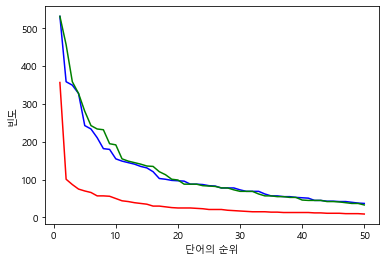

In [27]:
x = range(1, 51)
y = [pair[1] for pair in rawList.most_common(50)]  
yy = [pair[1] for pair in pairList.most_common(50)]   
yyy = [pair[1] for pair in wordList.most_common(50)]   

plt.plot(x, y, "r-")
plt.plot(x, yy, "b-")
plt.plot(x, yyy, "g-")

plt.xlabel("단어의 순위")
plt.ylabel("빈도")

### naver 뉴스 기사 POS tagging

Text(0, 0.5, '빈도')

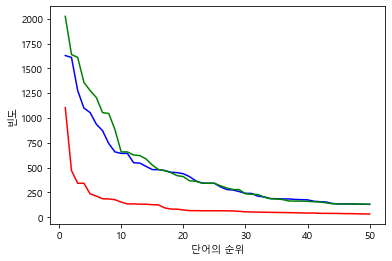

In [28]:
import os

# 뉴스 기사 읽어오기
path = "naver_news"
corpus = ""
for file in [_ for _ in os.listdir(path) if _.endswith(".txt")]:
    with open("{0}/{1}".format(path, file), encoding="utf8") as fp:
        corpus += fp.read()

# word tokenize
rawList = FreqDist()
for term in word_tokenize(corpus):
    rawList[term] += 1

# Kkma POS tagging
tokens = Kkma().pos(corpus)

pairList = FreqDist()
wordList = FreqDist()
posList = FreqDist()

for pair in tokens:
    pairList[pair] += 1
    wordList[pair[0]] += 1
    posList[pair[1]] += 1
    
# 그래프 그리기
x = range(1, 51)
y = [pair[1] for pair in rawList.most_common(50)]  
yy = [pair[1] for pair in pairList.most_common(50)]   
yyy = [pair[1] for pair in wordList.most_common(50)]   

plt.plot(x, y, "r-")
plt.plot(x, yy, "b-")
plt.plot(x, yyy, "g-")

plt.xlabel("단어의 순위")
plt.ylabel("빈도")